In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Copy of combinedNetflixData.txt",names=['custid','ratings'],usecols=[0,1])

In [ ]:
df

,custid,ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
df.shape

(24058263, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   custid   object 
 1   ratings  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
df.isnull().sum()

,0
custid,0
ratings,4499


In [ ]:
total_movies= df.isnull().sum()['ratings']

In [ ]:
total_movies

4499

In [ ]:
total_cust=df.notnull().sum()['ratings']
total_cust

24053764

In [ ]:
df['custid'].nunique()-4499

470758

In [ ]:
# there may be a case that any user has not given a rating and thus we may count it as movie id thus we will see the wos having movie id
df_movie= pd.DataFrame(pd.isnull(df['ratings']))

In [ ]:
df_movie[df_movie['ratings']== True]

,ratings
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
df.iloc[24056849	]

,24056849
custid,4497:
ratings,NaN


In [ ]:
df.iloc[24046714]

,24046714
custid,4495:
ratings,NaN


In [ ]:
df['ratings'].value_counts()

,count
ratings,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


<Axes: xlabel='ratings'>

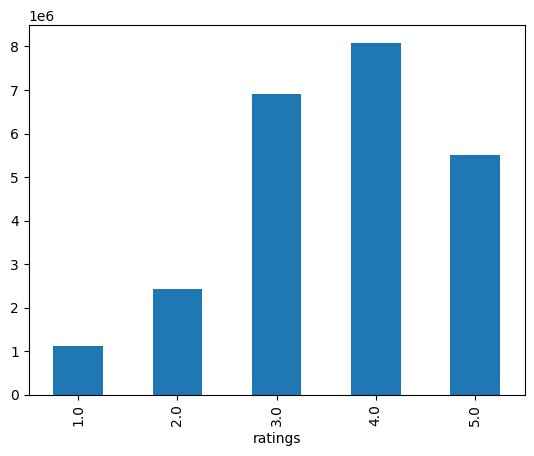

In [ ]:
stars= df.groupby('ratings')['ratings'].count().plot(kind='bar')
stars

In [ ]:
movie_id=None
unique_movies=[]
movie_list=[]
for i in df['custid']:
  if ':' in i:
    movie_id= int(i.replace(':',''))
    unique_movies.append(movie_id)
  movie_list.append(movie_id)

In [ ]:
movie_list

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
len(movie_list)

24058263

In [ ]:
len(unique_movies)

4499

In [ ]:
temp=df.copy()
temp['movie_id']= movie_list

In [ ]:
temp

,custid,ratings,movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
#figuring out which customer rated how much for which movies

In [ ]:
df= temp.copy()
df.dropna(inplace=True)

#**Filtering**
1. Set a benchmark to filter out the movies that have very less ratings that means they are not popular movies and we will remove them
2. Set benchmark to filter out the dormant users (non active customer) with very less ratings so we can remove them as they don't give much input

In [ ]:
#find which movie is having how many ratings

In [ ]:
movie_list= df.groupby('movie_id')['ratings'].agg(['count'])
movie_list

,count
movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [ ]:
movie_list.max()

,0
count,193941


In [ ]:
benchmark=movie_list['count'].quantile(0.7)
benchmark

1798.6

In [ ]:
benchmark_d= np.round(benchmark)
benchmark_d

1799.0

In [ ]:
movie_list_drop= movie_list[movie_list['count']<benchmark_d].index
movie_list_drop

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=3149)

In [ ]:
cust_list=df.groupby('custid')['ratings'].agg(['count'])
cust_list

,count
custid,
10,49
1000004,1
1000027,30
1000033,101
1000035,20
...,...
999964,48
999972,35
999977,14


In [ ]:
benchmark_cust= cust_list['count'].quantile(0.7)
benchmark_cust

52.0

In [ ]:
benchmark_cust= np.round(benchmark_cust)
benchmark_cust

52.0

In [ ]:
cust_list_drop= cust_list[cust_list['count']<benchmark_cust].index
cust_list_drop

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='custid', length=327300)

In [ ]:
df= df[~df['movie_id'].isin(movie_list_drop)]

In [ ]:
df=df[~df['custid'].isin(cust_list_drop)]

In [ ]:
df

,custid,ratings,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
movie_df= pd.read_csv('/content/Copy of NetflixMovieData.csv', names=['movieid','year','name'],usecols=[0,1,2])

In [ ]:
movie_df

,movieid,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
movie_df.set_index('movieid', inplace=True)

In [ ]:
movie_df

,year,name
movieid,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
movie_df.isnull().sum()

,0
year,7
name,0


In [ ]:
df

,custid,ratings,movie_id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056841,520675,3.0,4496
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056845,1559566,3.0,4496


#**Creation Of Recommendation System**

In [ ]:
!pip install scikit-surprise

In [ ]:
!pip install "numpy<2"


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
#svd= single value decomposition- it works on matrix tus we have to convert our data into matrix


In [ ]:
#reader convert data into matrix.. then svd will convert the obtained matrix tnto two matrix based on some important relation.
# and then that two matrix will make up a singular amtrix which would be the desirabel to obtain the recommendation


In [ ]:
reader=Reader()

In [ ]:
data= Dataset.load_from_df(df[['custid','movie_id','ratings']][:100000],reader)

In [ ]:
data

#**Model building**

In [ ]:
model= SVD()
cross_validate(model,data, measures=['RMSE'],cv=4)

{'test_rmse': array([1.00535212, 0.98981513, 0.99226015, 0.99923235]),
 'fit_time': (2.437081813812256,
  1.4239120483398438,
  2.1662392616271973,
  1.595008373260498),
 'test_time': (0.13738012313842773,
  0.13704252243041992,
  0.18874144554138184,
  0.12329506874084473)}

In [ ]:
df.sample(2)

,custid,ratings,movie_id
12388645,308068,5.0,2385
20378832,302554,4.0,3864


In [ ]:
data_1334853= df[(df['custid']=='302554'	)& (df['ratings']==5.0)]
data_1334853

,custid,ratings,movie_id
8566794,302554,5.0,1707
12084834,302554,5.0,2342
14218523,302554,5.0,2743
15094945,302554,5.0,2905
17007438,302554,5.0,3282


In [ ]:
data_1002025 =df[(df['custid']=='1002025') & (df['ratings']==5.0)]
data_1002025

,custid,ratings,movie_id
288686,1002025,5.0,76
454381,1002025,5.0,138
476158,1002025,5.0,143
954488,1002025,5.0,215
1267950,1002025,5.0,281
1528611,1002025,5.0,312
1864219,1002025,5.0,345
2489814,1002025,5.0,459
2527539,1002025,5.0,468
3086419,1002025,5.0,571


In [ ]:
possible_movies= movie_df.copy()

In [ ]:
possible_movies.reset_index(inplace=True)

In [ ]:
possible_movies

,index,movieid,year,name
0,0,1,2003.0,Dinosaur Planet
1,1,2,2004.0,Isle of Man TT 2004 Review
2,2,3,1997.0,Character
3,3,4,1994.0,Paula Abdul's Get Up & Dance
4,4,5,2004.0,The Rise and Fall of ECW
...,...,...,...,...
17764,17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17765,17767,2004.0,Fidel Castro: American Experience
17766,17766,17768,2000.0,Epoch
17767,17767,17769,2003.0,The Company


In [ ]:
possible_movies= possible_movies[~possible_movies['movieid'].isin(data_1002025['movie_id'])]

In [ ]:
 possible_movies['Estimate Scores'] = possible_movies['movieid'].apply(lambda x: model.predict('1002025',x).est)

/tmp/ipython-input-3374155508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_movies['Estimate Scores'] = possible_movies['movieid'].apply(lambda x: model.predict('1002025',x).est)


In [ ]:
possible_movies.sort_values(by = 'Estimate Scores',ascending = False)

,index,movieid,year,name,Estimate Scores
17,17,18,1994.0,Immortal Beloved,4.054074
29,29,30,2003.0,Something's Gotta Give,3.947542
2,2,3,1997.0,Character,3.941698
27,27,28,2002.0,Lilo and Stitch,3.733426
11865,11865,11867,1994.0,Ed Sullivan: Rock 'n' Roll Forever,3.632553
...,...,...,...,...,...
17768,17768,17770,2003.0,Alien Hunter,3.632553
16,16,17,2005.0,7 Seconds,3.154498
25,25,26,2004.0,Never Die Alone,2.895821
15,15,16,1996.0,Screamers,2.841503


In [ ]:
df.sample(1)

,custid,ratings,movie_id
19138623,479898,3.0,3638


In [ ]:
data_479898= df[(df['custid']=='479898') & (df['ratings']==5.0)]
data_479898

,custid,ratings,movie_id
215060,479898,5.0,33
685000,479898,5.0,187
741059,479898,5.0,191
1267261,479898,5.0,281
1687012,479898,5.0,329
2398109,479898,5.0,457
2870785,479898,5.0,528
3052297,479898,5.0,571
3504404,479898,5.0,668
3616059,479898,5.0,696


In [ ]:
possible_movies1= movie_df.copy()
possible_movies1.reset_index(inplace=True)
possible_movies1

,movieid,year,name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
possible_movies1= possible_movies1[~possible_movies1['movieid'].isin(data_479898['movie_id'])]

In [ ]:
possible_movies1['Estimate Scores']= possible_movies1['movieid'].apply(lambda x:model.predict('60539',x).est)

/tmp/ipython-input-2509424001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  possible_movies1['Estimate Scores']= possible_movies1['movieid'].apply(lambda x:model.predict('60539',x).est)


In [ ]:
possible_movies1.sort_values(by='Estimate Scores',ascending = False)

,movieid,year,name,Estimate Scores
27,28,2002.0,Lilo and Stitch,3.843613
17,18,1994.0,Immortal Beloved,3.772218
29,30,2003.0,Something's Gotta Give,3.684279
2,3,1997.0,Character,3.664703
11860,11862,2002.0,The Real World: Exotic Vacations,3.605280
...,...,...,...,...
17768,17770,2003.0,Alien Hunter,3.605280
7,8,2004.0,What the #$*! Do We Know!?,3.160383
15,16,1996.0,Screamers,3.139686
16,17,2005.0,7 Seconds,2.890339
